<table>
    <tr>
        <td><img src="./imagenes/Macc.png" width="400"/></td>
        <td>&nbsp;</td>
        <td>
            <h1 style="color:blue;text-align:left">Inteligencia Artificial</h1></td>
        <td>
            <table><tr>
            <tp><p style="font-size:150%;text-align:center">Miniproyecto 2</p></tp>
            </tr></table>
        </td>
    </tr>
</table>

---

## Dependencias:

In [1]:
from busqueda import *
from tiempos import compara_funciones
from testSuites import test_suite_heuristicas_triangulos
from triangulo_magico import *
import seaborn as sns

## Clase del Problema:

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random
class triangulo_magico:
    '''
    @Autores: Juan Esteban Gonzalez y Leonardo Luengas
    
    Clase que construye un triangulo mágico con n nodos en cada arista.
    Objetivo: Encontrar una asignación de los números naturales del 1 hasta el 3(n-1) de tal forma que la suma de todos los
    números en cada arista sea igual y no se repitan números en ningún nodo.
    Input: n, numero de vértices por lado
    Output: triángulo mágico de n vértices por lado
    '''
    def __init__(self, n=3):
        '''
        Inicializa el triángulo mágico con una asignación aleatoria de números.
        '''
        l = [x for x in range(1,3*n-2)]
        random.shuffle(l)
        self.estado_inicial= l
        self.vertices = n
        self.max = max(l)
        
    def pintar_estado(self,estado):
        '''
        Input: recibe una lista que representa un estado del triángulo mágico con n vértices en cada lado
        Output: Dibuja la representación gráfica del triángulo mágico
        '''
        assert len(estado) == len(self.estado_inicial), f"{estado} no es compatible con un triangulo mágico de {self.vertices} vértices" 
        G = nx.Graph()
        G.add_nodes_from(estado)
        estado1 = estado[1:]
        estado1.append(estado[0])
        E = [e for e in zip(estado,estado1)]
        G.add_edges_from(E)
        order = {}
        n = self.vertices
        for i in range(n):
            e1 = estado[i]
            e2 = estado[i+n-1]
            e3 = estado[i+2*(n-1)-1]
            order[e1] = [i,0]
            order[e2] = [(n-1)-(i/2),(np.sqrt(3)*i)/2]
            order[e3] = [(n-i)/2,(np.sqrt(3)*(n-i))/2]
        nx.draw_networkx(G,pos=order)
        plt.show()
        
    def acciones_aplicables(self, estado):
        '''
        Input: estado, una lista que representa el triángulo mágico con n vértices en cada lado
        Output: Una lista con todas las tuplas que se pueden intercambiar para un estado. Son listas con dos tuplas de la forma
        (indice_del_elemento, elemento)
        '''
        assert len(estado) == len(self.estado_inicial), f"{estado} no es compatible con un triangulo mágico de {self.vertices} vértices" 
        res = []
        tot = 3*(self.vertices-1)+1
        for i, e in enumerate(estado):
            if e != self.max:
                inicial = (i,e)
                temp = [(f,y) for f,y in enumerate(estado) if y != e and y != self.max]
                for x in temp:
                    new = [(x,inicial)]
                    res += new
        #Truncar las acciones aplicables a 5 seleccionadas aleatoriamente
        res_trunc = random.choices(res, k=5)
        return res_trunc
    
    def transicion(self, estado, accion):
        '''
        Input: estado, una lista que representa un estado del problema del triángulo mágico con n vértices en cada lado
               accion, una lista con dos tuplas de la forma (indice_del_elemento, elemento).
        Output: lista con la acción ya aplicada
        '''
        assert len(accion) == 2 and accion[0][1] in self.estado_inicial and accion[1][1] in self.estado_inicial, "La acción no es válida"
        estado[accion[0][0]] = accion[1][1]
        estado[accion[1][0]] = accion[0][1]
        return estado
    
    def test_objetivo(self, estado):
        '''
        Input: estado, una lista que representa un estado del problema del triángulo mágico con n vértices en cada lado
        Output: Booleano que representa si el estado satisface el objetivo del problema
        '''
        setl=set(estado)
        if len(setl) !=len(estado) or (0 in estado):
            return False
        n = self.vertices
        fila1 = [estado[x] for x in range(0,n)]
        fila2 = [estado[x] for x in range(n-1,2*n-1)]
        fila3 = [estado[x] for x in range(2*(n-1),len(estado))]
        fila3.append(estado[0])
        matrix = np.matrix([fila1,fila2,fila3]).sum(axis=1)
        x = matrix[0]
        return (x==matrix).all()
        
    def costo(self, estado, accion):
        '''
        Input: estado, una lista que representa un estado del problema del triángulo mágico con n vértices en cada lado
               accion, una tupla con dos elementos que representan el índice de un elemento de la lista y el valor con el cual
               se va a reemplazar dicho índice.
        Output:int, entero positivo que representa el costo de realizar la acción sobre el triángulo
        '''
        return 1
    
    def codigo(self, estado):
        '''
        Input: estado, una lista que representa un estado del problema del triángulo mágico con n vértices en cada lado
        Output: string, que representa el estado
        '''
        assert len(estado) == len(self.estado_inicial), f"{estado} no es compatible con un triangulo mágico de {self.vertices} vértices" 
        cod = ''
        for x in estado:
            cod += str(x)
        return cod       

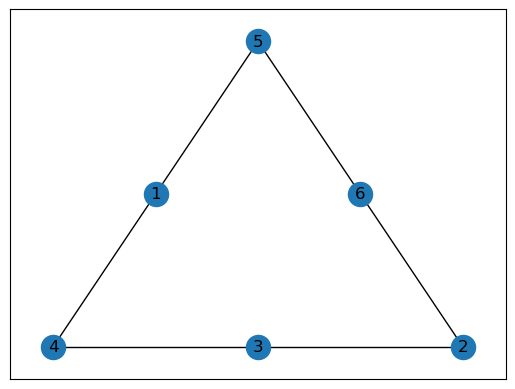

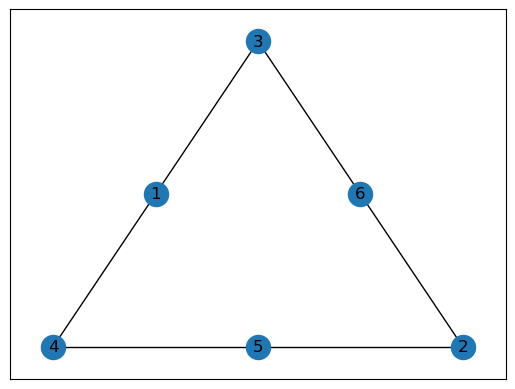

In [3]:
prob = triangulo_magico()
prob.test_objetivo([1,2,3,4,5,6])
prob.pintar_estado(prob.estado_inicial)
a = prob.acciones_aplicables(prob.estado_inicial)
a[0]
prob.pintar_estado(prob.transicion(prob.estado_inicial, a[0]))


In [4]:
from collections import namedtuple

Tupla = namedtuple('Tupla', ['elemento', 'valor'])
class ListaPrioritaria():
    
    def __init__(self):
        self.pila = []
        
    def __len__(self):
        return len(self.pila)

    def push(self, elemento, valor):
          if len(self.pila) != 1000:
            tupla = Tupla(elemento, valor)
            self.pila.append(tupla)
            self.pila.sort(key=lambda x: x[1])
            
    def pop(self):
        return self.pila.pop(0)[0]
    
    def is_empty(self):
        return len(self.pila) == 0
    
    def __len__(self):
        return len(self.pila)

    def __str__(self):
        cadena = '['
        inicial = True
        for elemento, valor in self.pila:
            if inicial:
                cadena += '(' + str(elemento) + ',' + str(valor) + ')'
                inicial = False
            else:
                cadena += ', (' + str(elemento) + ',' + str(valor) + ')'
        return cadena + ']'

In [5]:
def avara(problema):
    #Fijar el elemento más grande en una esquina
    s=problema.estado_inicial
    e_max= max(problema.estado_inicial)
    i_max = s.index(e_max)
    e_0 = s[0]
    s[0] = e_max
    s[i_max] = e_0
    
    nodo=Nodo(s, None, None, 0, problema.codigo(s))
    v=problema.heuristica(s)
    frontera = ListaPrioritaria()
    frontera.push(nodo, v)
    while frontera:
        nodo=frontera.pop()
        if problema.test_objetivo(nodo.estado):
            return nodo
        for hijo in expand(problema, nodo):
            s=hijo.estado
            v=problema.heuristica(s)
            if not is_cycle(hijo):
                frontera.push(hijo, v)
    return None

# Heurísticas

## Delta 

Esta heurisatica cosiste en sumar las diferencia de los 3 lados, el objetivo es que estas diferencias sean 0.

In [6]:
def delta(self,estado):
        n = self.vertices
        fila1 = [estado[x] for x in range(0,n)]
        fila2 = [estado[x] for x in range(n-1,2*n-1)]
        fila3 = [estado[x] for x in range(2*(n-1),len(estado))]
        fila3.append(estado[0])
        res=abs(sum(fila1)-sum(fila2))+abs(sum(fila1)-sum(fila3))+abs(sum(fila2)-sum(fila3))
        return res

In [7]:
setattr(triangulo_magico, 'heuristica', delta)

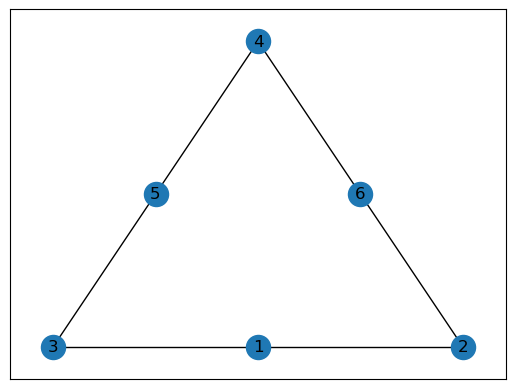

el valor delta de s1: 12


In [8]:
puz = triangulo_magico()
# Hacemos las comprobaciones
s1 = [3,1,2,6,4,5]
puz.pintar_estado(s1)
print('el valor delta de s1:', puz.heuristica(s1))

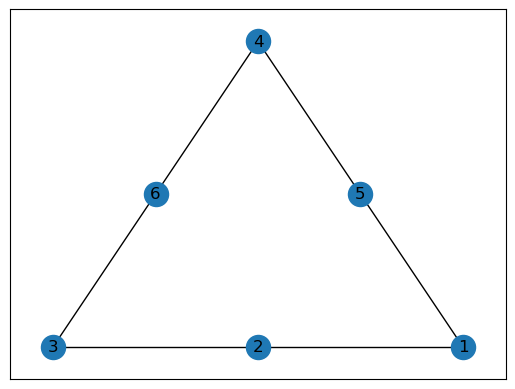

el valor delta de s2: 14


In [9]:
s2 = [3,2,1,5,4,6]
puz.pintar_estado(s2)
print('el valor delta de s2:', puz.heuristica(s2))

el valor delta de s3: 6


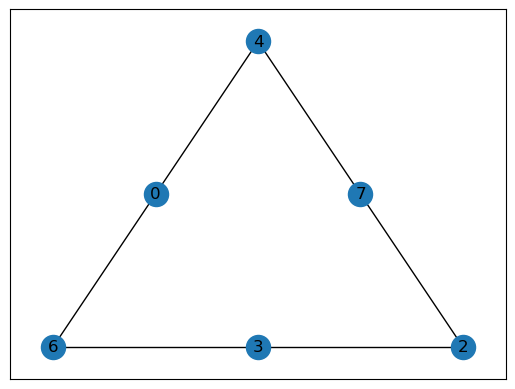

In [10]:
s3 = [6, 3, 2,7, 4, 0]
print('el valor delta de s3:', puz.heuristica(s3))
puz.pintar_estado(s3)

## minimos cuadrados (GAMMA)


Esta heurisatica cosiste en sumar las diferencia cuadrada de los 3 lados, el objetivo es que estas diferencias sean 0.

In [11]:
def gamma(self,estado):
        n = self.vertices
        fila1 = [estado[x] for x in range(0,n)]
        fila2 = [estado[x] for x in range(n-1,2*n-1)]
        fila3 = [estado[x] for x in range(2*(n-1),len(estado))]
        fila3.append(estado[0])
        res=(sum(fila1)-sum(fila2))**2+(sum(fila1)-sum(fila3))**2+(sum(fila2)-sum(fila3))**2
        return res

In [12]:
setattr(triangulo_magico, 'heuristica', gamma)

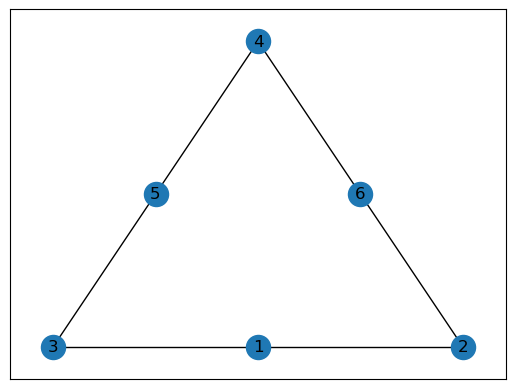

el valor cuadrado de s1: 72


In [13]:
puz = triangulo_magico()
# Hacemos las comprobaciones
s1 = [3,1,2,6,4,5]
puz.pintar_estado(s1)
print('el valor cuadrado de s1:', puz.heuristica(s1))

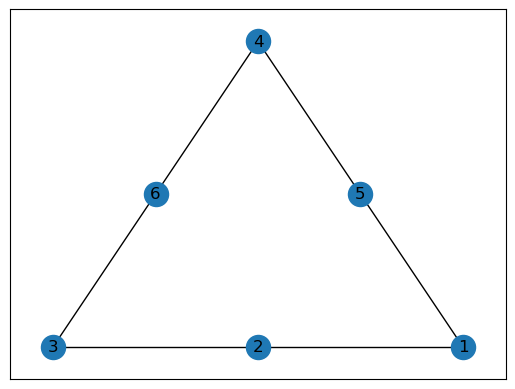

el valor cuadrado de s2: 74


In [14]:
s2 = [3,2,1,5,4,6]
puz.pintar_estado(s2)
print('el valor cuadrado de s2:', puz.heuristica(s2))

el valor cuadrado de s3: 14


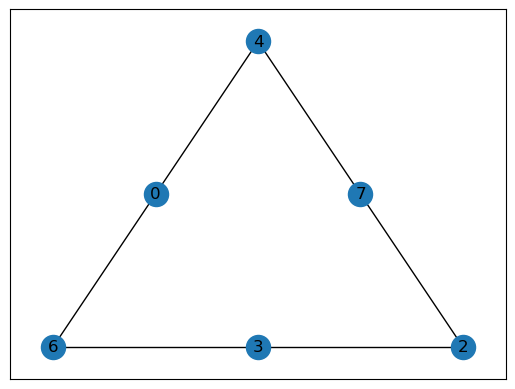

In [15]:
s3 = [6,3,2,7,4,0]
print('el valor cuadrado de s3:', puz.heuristica(s3))
puz.pintar_estado(s3)

## prueba de las heurísticas con la Funcion Avará 

In [36]:
# Definimos los triangulos a evaluar
init = [x for x in range(1,7)]
estados = []
for x in range(0,6):
    random.shuffle(init)
    s1 = init
    estados.append(s1)
# Definimos las heurísticas
heuristicas = [delta, gamma]
nombres = ['delta', 'gamma']
# Creamos el test suite
lista_tests, lista_nombres = test_suite_heuristicas_triangulos(estados, heuristicas, nombres)
lista_funs = [avara]*len(lista_tests)

In [39]:
%%time
data = compara_funciones(lista_funs=lista_funs, 
                         lista_args=lista_tests, 
                         lista_nombres=lista_nombres, 
                         num_it=5)
data.groupby('Función').agg({'tiempo_CPU':['mean', 'std']})

Wall time: 5min 4s


tiempo_CPU          
              mean       std
Función                     
delta     2.804617  0.205631
gamma     7.351917  1.230710

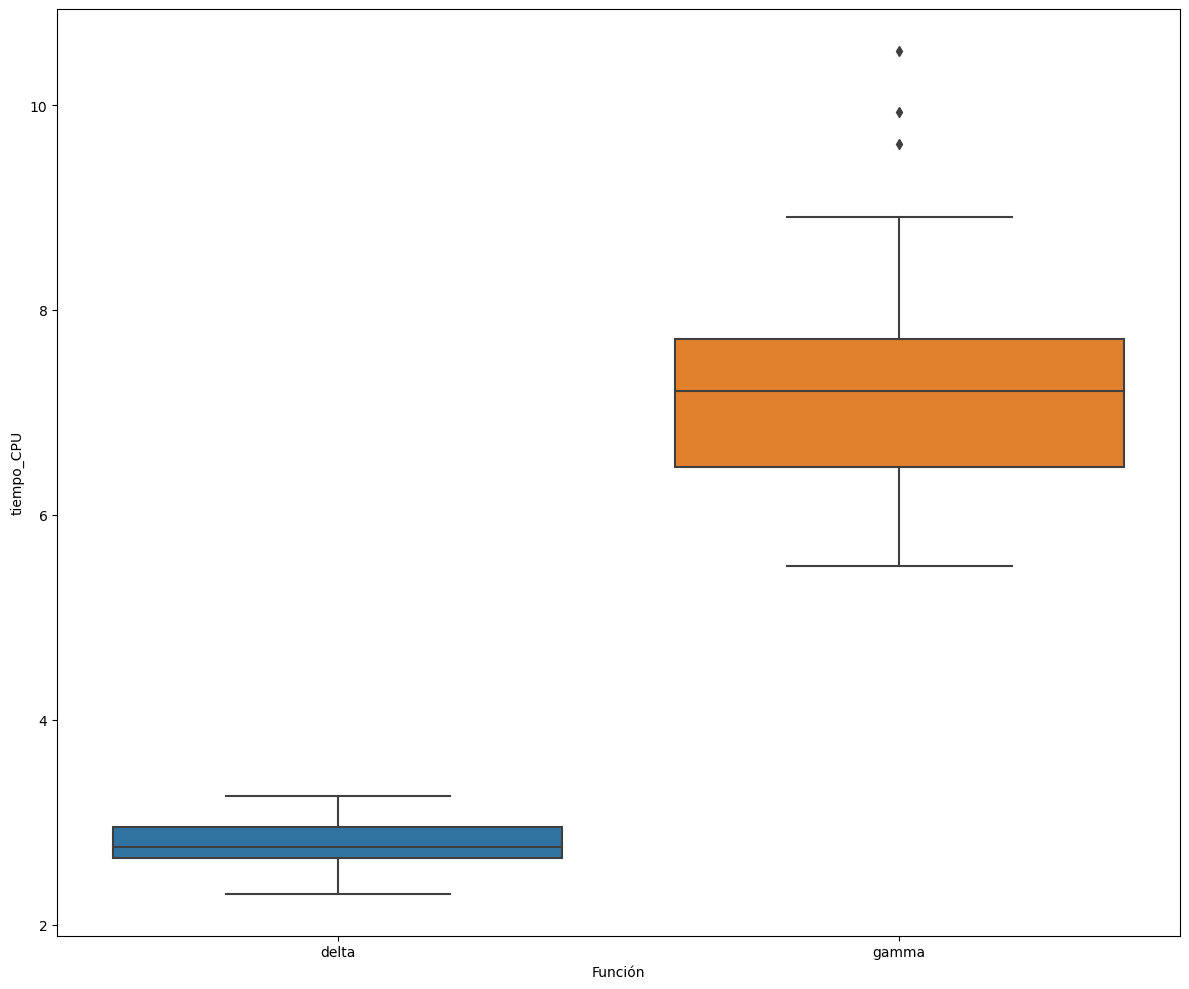

In [40]:
fig, ax = plt.subplots(1,1, figsize=(len(lista_funs),10), tight_layout=True)
sns.boxplot(data=data, x='Función', y='tiempo_CPU')
fig.savefig('box_puzzle.png')

## prueba de las heurísticas con la Funcion A*

In [21]:
def A_star(problema, W=2.5):
    s=problema.estado_inicial
    v=problema.heuristica(s)
    cod=problema.codigo(s)
    nodo=Nodo(s, None, None, 0, problema.codigo(s))
    frontera = ListaPrioritaria()
    frontera.push(nodo, v)
    explorados={cod:0}
    while frontera:
        nodo=frontera.pop()
        if problema.test_objetivo(nodo.estado):
            return nodo
        for hijo in expand(problema, nodo):
            s=hijo.estado
            v=problema.heuristica(s)
            cod=hijo.codigo
            c=hijo.costo_camino
            h=c+v
            if cod not in explorados or h < explorados[cod]:
                frontera.push(hijo, h)
                explorados[cod]=h              
            

In [48]:

# Definimos los triangulos a evaluar
init = [x for x in range(1,7)]
estados = []
for x in range(0,6):
    random.shuffle(init)
    s1 = init
    estados.append(s1)
# Definimos las heurísticas
heuristicas = [delta, gamma]
nombres = ['delta', 'gamma']
# Creamos el test suite
lista_tests, lista_nombres = test_suite_heuristicas_triangulos(estados, heuristicas, nombres)
lista_funs = [avara]*len(lista_tests) 
lista_nombres += ['$A^*$']*len(lista_tests)
lista_tests += lista_tests

In [51]:
%%time
data = compara_funciones(lista_funs=lista_funs, 
                         lista_args=lista_tests, 
                         lista_nombres=lista_nombres, 
                         num_it=5)
data.groupby('Función').agg({'tiempo_CPU':['mean', 'std']})

Wall time: 4min 51s


tiempo_CPU          
              mean       std
Función                     
delta     2.731233  0.223669
gamma     6.998100  1.074548

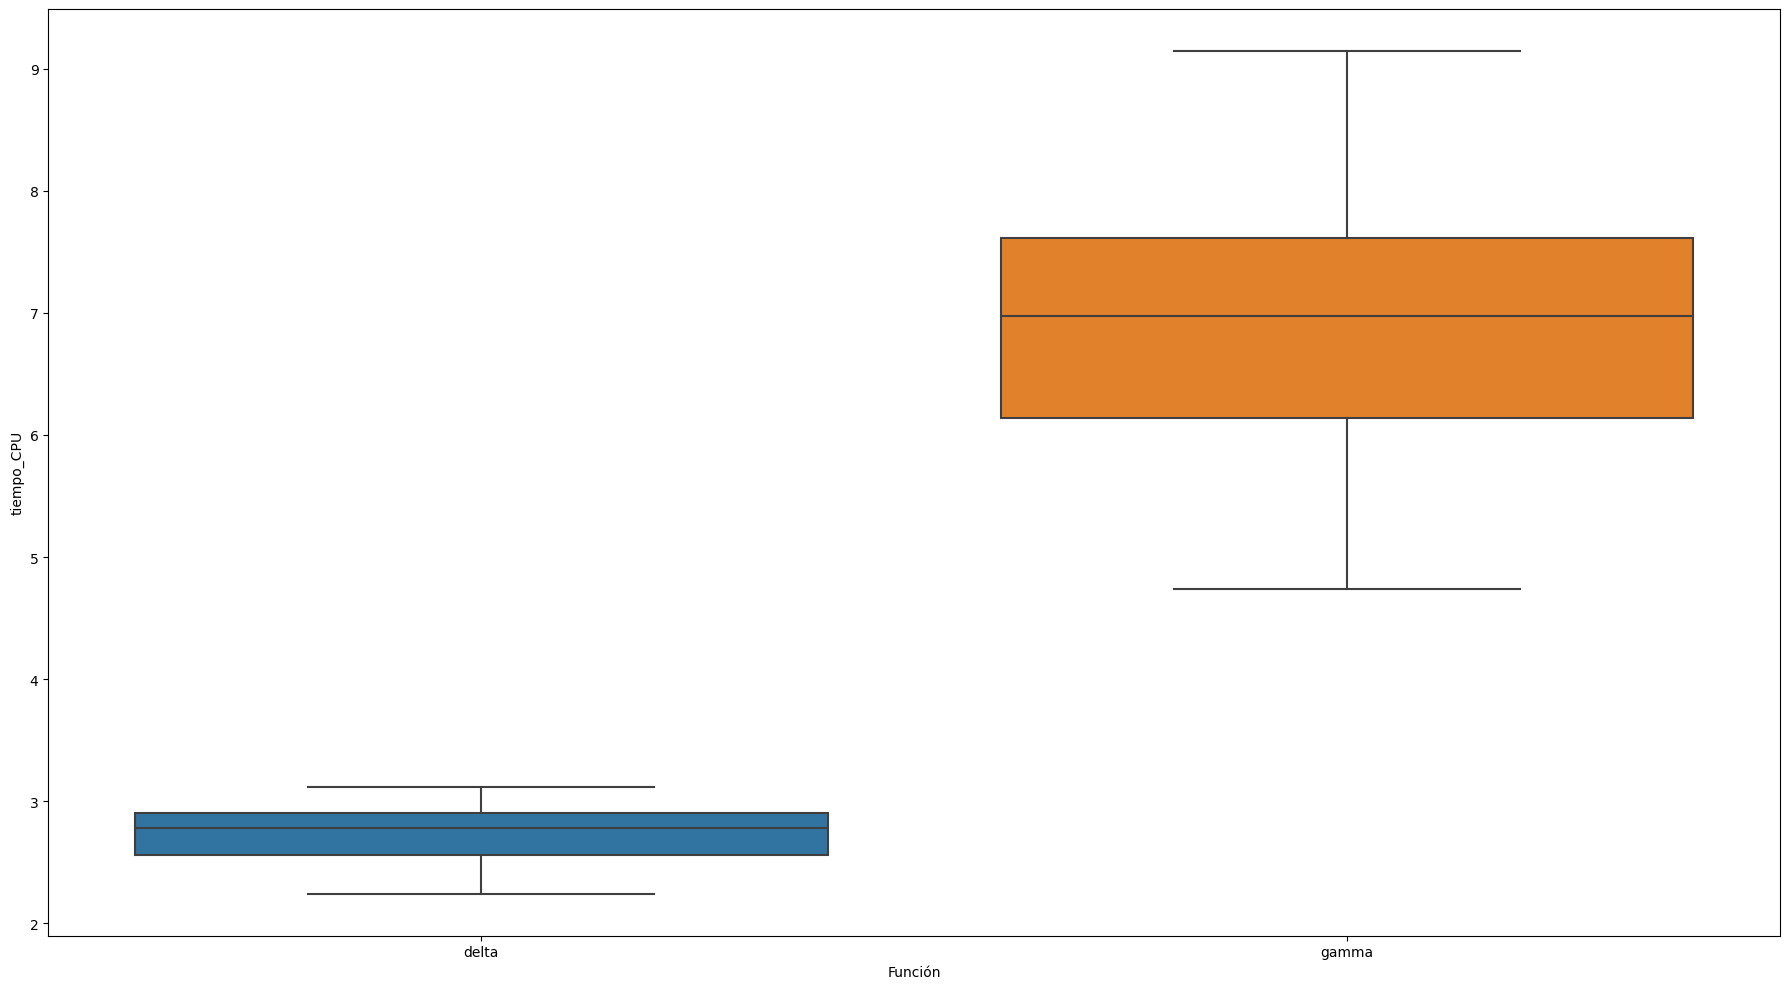

In [52]:
fig, ax = plt.subplots(1,1, figsize=(1.5*len(lista_funs),10), tight_layout=True)
sns.boxplot(data=data, x='Función', y='tiempo_CPU')
fig.savefig('box_puzzle1.png')